In [2]:
#Morphological Operators are sets of Kernels that can achieve a variety of effects such as reducing noise
#Certain operators are very good at reducing points on a white background
#Certain operators can also achieve an erosion and dilation effect that can add or erode from an existing image
#This effect is most easily seen on text data, so we will practice various morphological operator on some simple white text on a black background

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def load_img():
    blank_img = np.zeros((600, 600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text="ABCDE", org=(50, 300), fontFace=font, fontScale = 5, color=(255,255,255), thickness = 23)
    return blank_img

In [40]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [41]:
img = load_img()

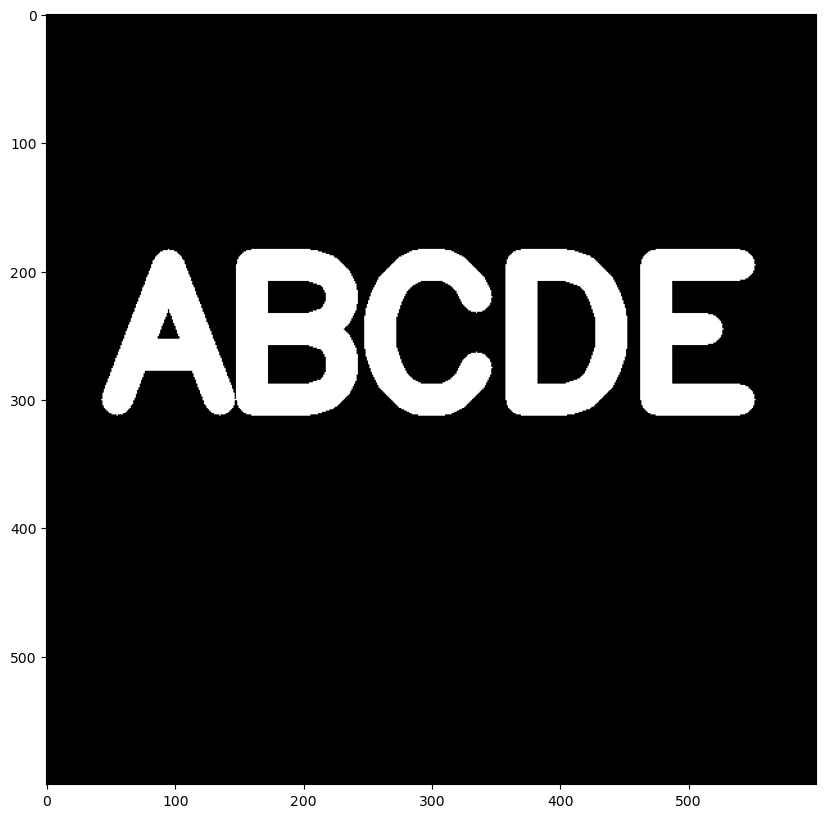

In [42]:
display_img(img)

In [43]:
#Morphological Operators
kernel = np.ones((5,5), dtype=np.uint8)

In [44]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [45]:
result = cv2.erode(img, kernel, iterations=1)

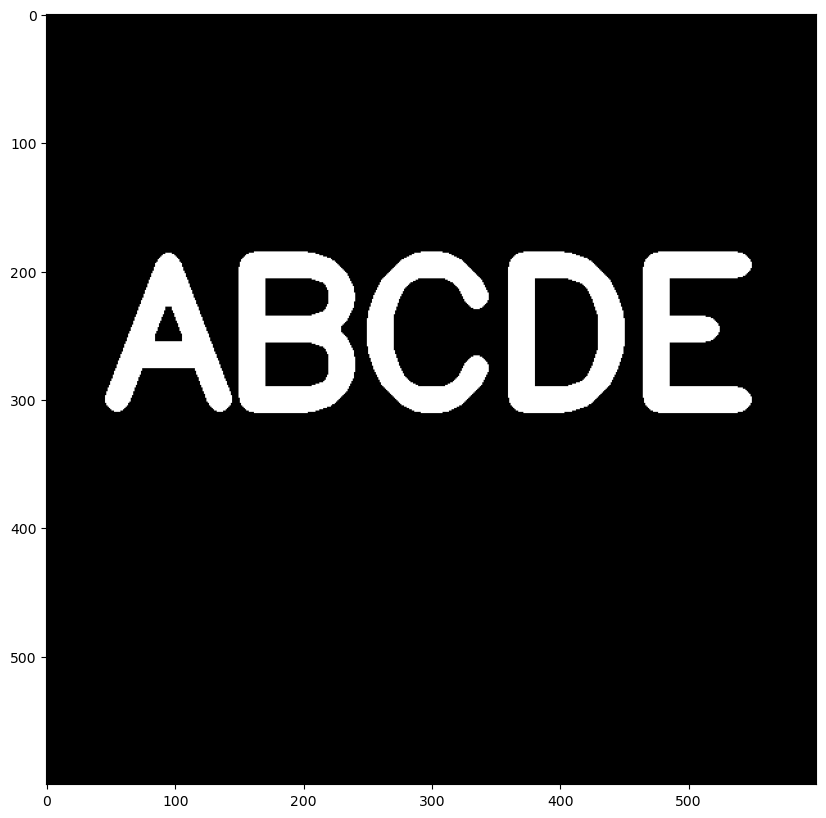

In [46]:
display_img(result)

In [47]:
img = load_img()

In [50]:
white_noise = np.random.randint(low=0, high=2, size=(600,600))

In [51]:
white_noise

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 1, 1],
       ...,
       [0, 1, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 0]])

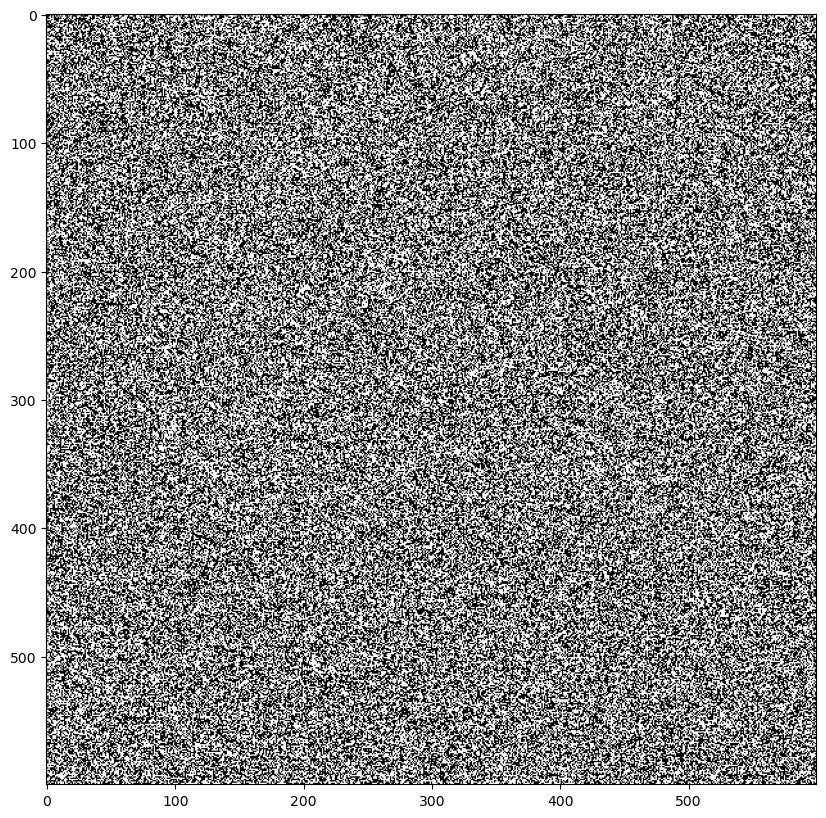

In [52]:
display_img(white_noise)

In [53]:
img.max()

255.0

In [54]:
white_noise = white_noise * 255

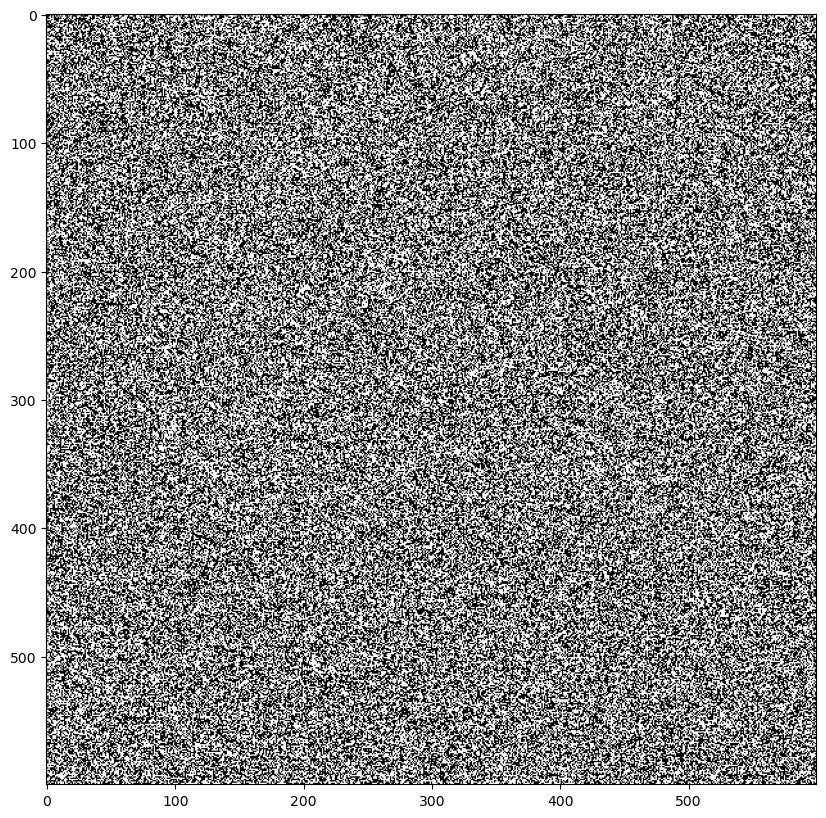

In [55]:
display_img(white_noise)

In [57]:
noise_img = white_noise + img

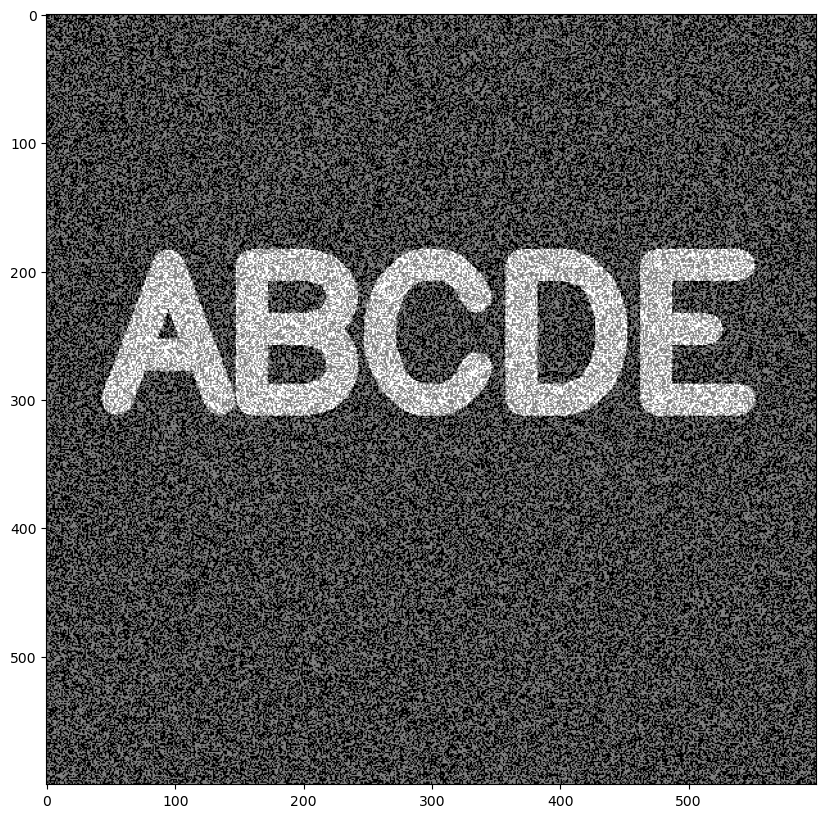

In [58]:
display_img(noise_img)

In [59]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel) #For background Noise

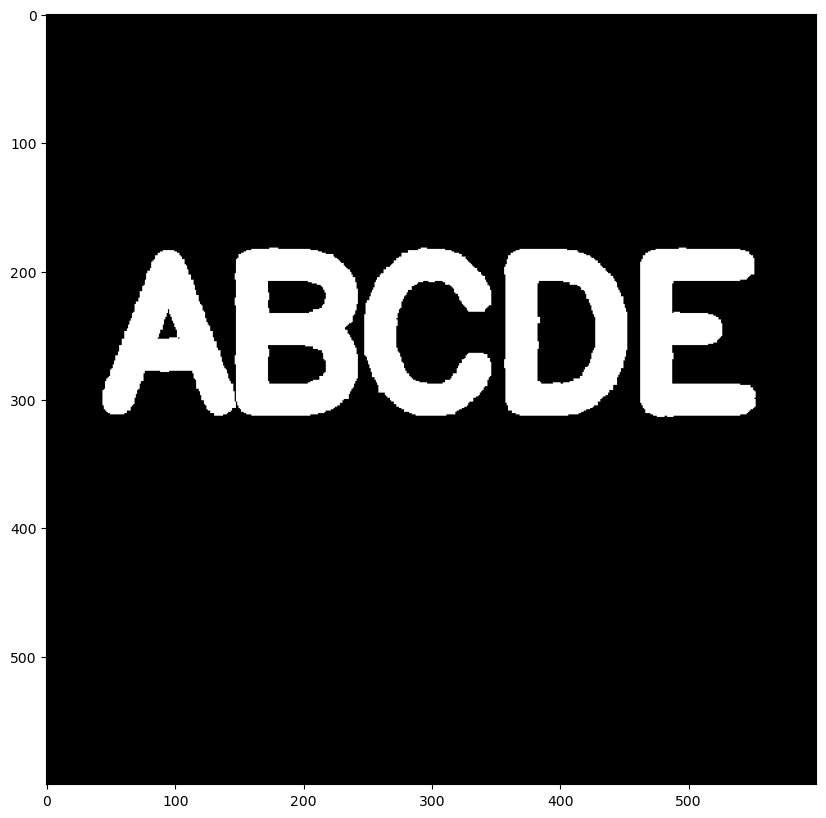

In [60]:
display_img(opening)

In [61]:
#Now for the foreground noise
img = load_img()

In [62]:
black_noise = np.random.randint(low=0, high=2, size=(600, 600))

In [63]:
black_noise = black_noise * -255

In [64]:
black_noise

array([[-255,    0,    0, ...,    0,    0, -255],
       [   0, -255,    0, ..., -255,    0, -255],
       [-255, -255,    0, ...,    0, -255, -255],
       ...,
       [   0, -255, -255, ...,    0,    0,    0],
       [   0, -255,    0, ...,    0, -255,    0],
       [-255, -255, -255, ...,    0, -255, -255]])

In [65]:
black_noise_img = img+ black_noise

In [66]:
black_noise_img

array([[-255.,    0.,    0., ...,    0.,    0., -255.],
       [   0., -255.,    0., ..., -255.,    0., -255.],
       [-255., -255.,    0., ...,    0., -255., -255.],
       ...,
       [   0., -255., -255., ...,    0.,    0.,    0.],
       [   0., -255.,    0., ...,    0., -255.,    0.],
       [-255., -255., -255., ...,    0., -255., -255.]])

In [67]:
black_noise_img[black_noise_img==-255] = 0

In [68]:
black_noise_img.min()

0.0

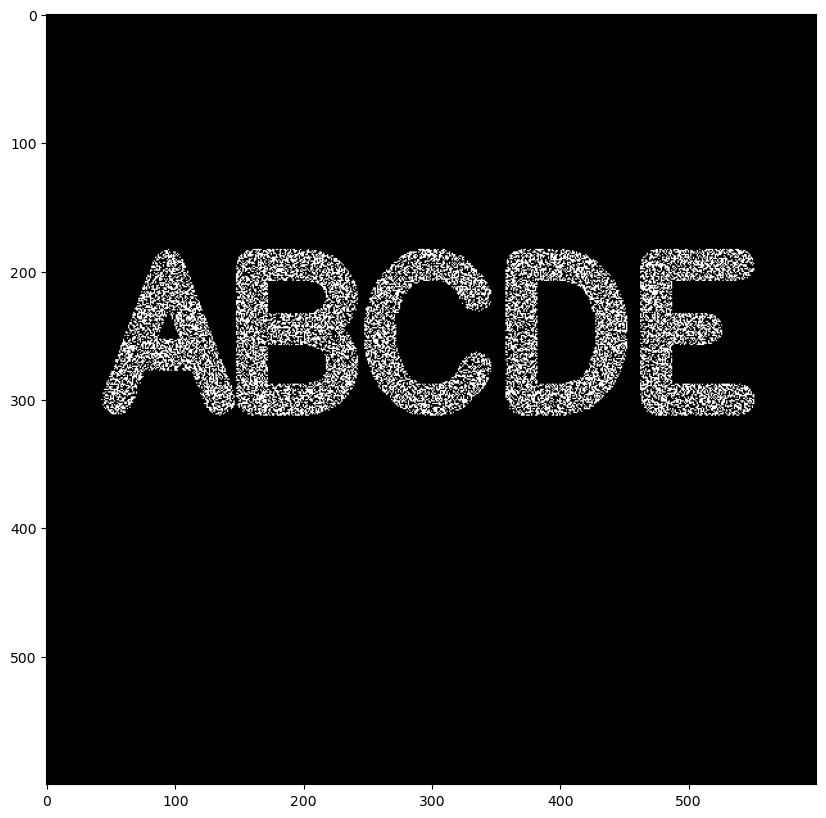

In [69]:
display_img(black_noise_img)

In [71]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)

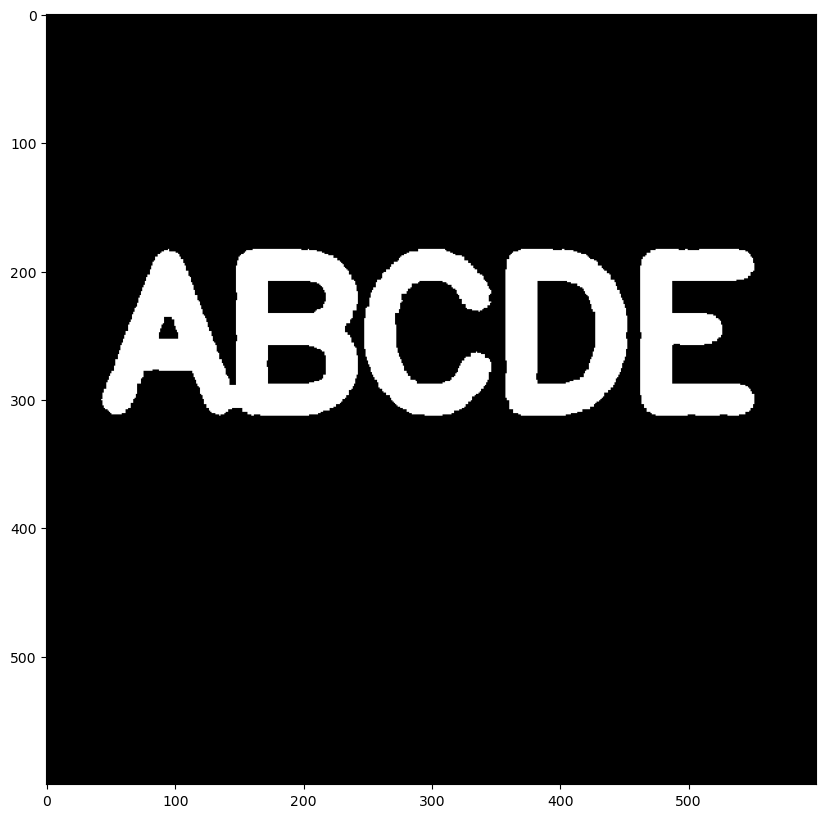

In [72]:
display_img(closing)

In [73]:
img = load_img()

In [74]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

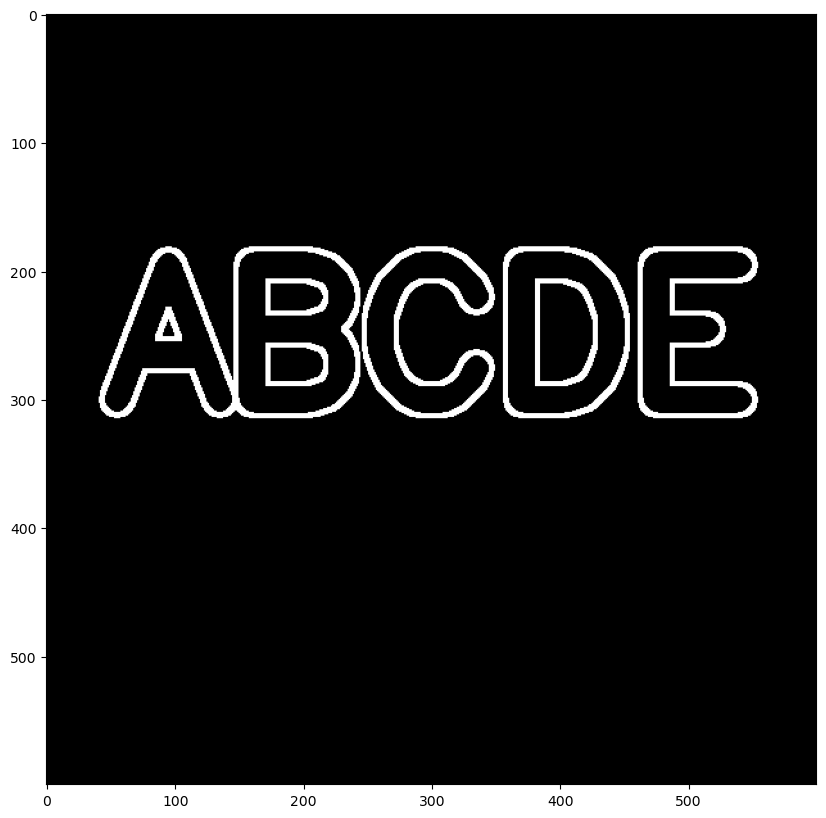

In [75]:
display_img(gradient)